# Case Study on Measures of Central Tendency and Dispersion

# An Institution wishes to find out their student’s ability in maths, reading and
writing skills. The Institution wants to do an exploratory study to check the
following information.
1. Find out how many males and females participated in the test.
2. What do you think about the students' parental level of education?
3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course
4. What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course
5. The management needs your help to give bonus points to the top 25% of
students based on their maths score, so how will you help the management
to achieve this.

## Read the dataset to python environment

In [17]:
# Import Libraries for basic operations.
import numpy as np
import pandas as pd
# Import libraries for visualizations.
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('StudentsPerformance.csv')

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


## Checking columns

In [95]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Check for the null values present in the dataset.

In [11]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
# Descriptive statistics
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [22]:
#check the no. of unique items present in the categorical column
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [23]:
#check the percentage of missing data in each columns present in the data
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


## 1. Find out how many males and females participated in the test

In [97]:
# Use value counts function on the gender column and see the result
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [99]:
#using groupby function
data.groupby(["gender"]).count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,,,,,,,
female,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482


## 2. What do you think about the students' parental level of education? 

In [100]:
data.groupby(["parental level of education"])["reading score"].describe()

,count,mean,std,min,25%,50%,75%,max
parental level of education,,,,,,,,
associate's degree,222.0,71.018018,13.842999,31.0,61.0,73.0,81.00,100.0
bachelor's degree,118.0,73.000000,14.285250,41.0,63.0,73.0,82.75,100.0
high school,196.0,64.602041,14.245280,24.0,54.0,66.0,74.25,99.0
master's degree,59.0,75.949153,13.046896,53.0,66.5,76.0,84.50,100.0
some college,226.0,69.566372,14.312932,23.0,60.0,71.0,80.00,100.0
some high school,179.0,66.759777,15.710633,17.0,56.5,67.0,79.00,100.0


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


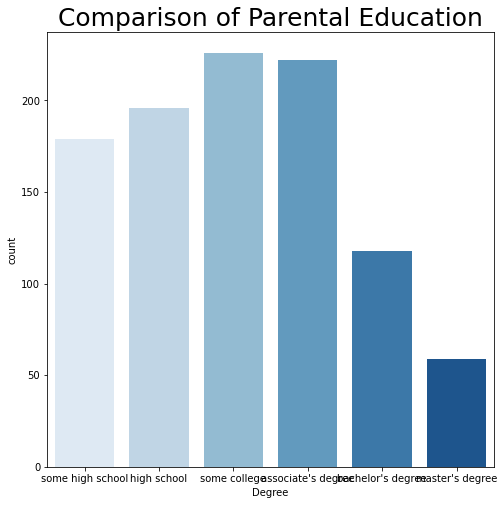

In [86]:
# Visual representation
plt.figure(figsize=(8,8))
sns.countplot(data['parental level of education'],palette = 'Blues')
plt.title('Comparison of Parental Education',fontweight=30,fontsize=25)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

## 3. Who scores the most on average for math, reading and writing based on Gender and Test preparation course

### On the basis of gender

In [91]:
#Based on Gender.
data[['gender','math score','writing score',
      'reading score']].groupby(['gender']).agg('mean')

,math score,writing score,reading score
gender,,,
female,63.376448,72.467181,72.590734
male,68.821577,63.446058,65.545643


### Using groupby function

In [110]:
# the most average for math on the basis of gender
data.groupby(["gender"])["math score"].mean()

gender
female    63.376448
male      68.821577
Name: math score, dtype: float64

In [111]:
# the most average for reading score on the basis of gender
data.groupby(["gender"])["reading score"].mean()

gender
female    72.590734
male      65.545643
Name: reading score, dtype: float64

In [112]:
# the most average for writing score on the basis of gender
data.groupby(["gender"])["writing score"].mean()

gender
female    72.467181
male      63.446058
Name: writing score, dtype: float64

### On the basis of Test preperation course

In [113]:
# Test preperation course.
data[['test preparation course','math score','writing score',
      'reading score']].groupby(['test preparation course']).agg('mean')

,math score,writing score,reading score
test preparation course,,,
completed,69.96648,74.684358,74.175978
none,63.78972,64.457944,66.417445


### Using groupby function

In [114]:
# the most average for math on the basis of test preparation course
data.groupby(["test preparation course"])["math score"].mean()

test preparation course
completed    69.96648
none         63.78972
Name: math score, dtype: float64

In [115]:
# the most average for reading score on the basis of test preparation course
data.groupby(["test preparation course"])["reading score"].mean()

test preparation course
completed    74.175978
none         66.417445
Name: reading score, dtype: float64

In [116]:
#the most average for writing score on the basis of test preparation courser
data.groupby(["test preparation course"])["writing score"].mean()

test preparation course
completed    74.684358
none         64.457944
Name: writing score, dtype: float64

## 4. What do you think about the scoring variation for math, reading and writing based on  Gender and Test preparation course

### Based on Gender

In [118]:
#the most scoring variation for math on the basis of gender
data.groupby(["gender"])["math score"].std()

gender
female    16.029928
male      14.556411
Name: math score, dtype: float64

In [119]:
#the most scoring variation for reading score on the basis of gender
data.groupby(["gender"])["reading score"].std()

gender
female    14.411018
male      14.149594
Name: reading score, dtype: float64

In [120]:
#the most scoring variation for writing score on the basis of gender
data.groupby(["gender"])["writing score"].std()

gender
female    14.844842
male      14.227225
Name: writing score, dtype: float64

### Based on Test preperation course

In [121]:
#the most scoring variation for math on the basis of test preparation course
data.groupby(["test preparation course"])["math score"].std()

test preparation course
completed    14.521847
none         15.705689
Name: math score, dtype: float64

In [122]:
#the most scoring variation for reading score on the basis of test preparation course
data.groupby(["test preparation course"])["reading score"].std()

test preparation course
completed    13.537572
none         14.608896
Name: reading score, dtype: float64

In [123]:
#the most scoring variation for writing score on the basis of test preparation courser
data.groupby(["test preparation course"])["writing score"].std()

test preparation course
completed    13.236412
none         15.041667
Name: writing score, dtype: float64

## 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [125]:
#25 percent of 1000= 250.
#so we're considering top 250 students which scored 25% above in maths score. 
top_students=data.nlargest(250,'math score')
top_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86
429,female,group E,some high school,standard,none,77,79,80
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64


In [ ]:
# Inference 1 - Most of the parents have went to some college whereas master's degree is the rarest qualifiaction 
# amongst parents
# Inference 2 - When the parental level of education increases, the mean score of student in all the subjects increases
# Inference 3 - Males scores better than females in Math whereas females scores better in reading and writing
# Inference 4 - Scoring variation is higher for females in math whereas variation is only slightly higher among females 
# than males for reading and writing